## W poniższym okienku proszę wpisać swoje **imię, nazwisko i numer grupy**.

*   Imię: Wojciech
*   Nazwisko: Siemiątkowski
*   Grupa: 12c

## **Dynamika punktu materialnego**

Ruch swobodnego punktu materialnego:

### $\frac{d^2 {\bf r}(t)}{dt^2} = \frac{{\bf F}(t)}{m} \quad $   ( II zasada dynamiki Newtona).

Powyższe równanie II rzędu, można zapisać w postaci dwóch równań I rzędu:

### $ \frac{d{\bf r}(t)}{dt} = {\bf v}(t) $

### $ \frac{d{\bf v}(t)}{dt} = \frac{{\bf F}(t)}{m}$.

Rozwiązanie powyższego układu równań można wyznaczyć metodą Eulera:

$ {\bf r}(t+h) = {\bf r}(t) + {\bf v} (t) \cdot h$ 

$ {\bf v}(t+h) = {\bf v}(t) + \frac{{\bf F}(t)}{m} \cdot h$.

Wektor ${\bf F}(t)$ opisuje wypadkową siłę działającą na punkt materialny. W szczególności ${\bf F}(t)$ może być sumą sił grawitacyjnej ${\bf F_g} = m {\bf g}$ oraz siły oporu ośrodka ${\bf F_t}  = - c {\bf v}(t)$.


 # **Zadanie 0** 

 Uzupełnij funkcję *odeEuler2* tak, aby implementowała rozwiązywanie powyższego układu równań różniczkowych metodą Eulera.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

def odeEuler2(f1, f2, r0, v0, t):
    '''
    f1 : funkcja, prawa strona równania 1
    f2 : funkcja, prawa strona równania 2
    r0 : trójwymiarowy wektor położenia początkowego, tablica numpy
    v0 : trójwymiarowy wektor prędkości początkowych, tablica numpy
    t  : jednowymiarowy wektor puntków czasowych, tablica numpy
    '''
    r = np.zeros((len(t),3))
    v = np.zeros((len(t),3))
    r[0,:] = r0
    v[0,:] = v0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        r[n+1,:] = r[n,:] + f1(r[n, :], v[n, :], t[n]) * h
        v[n+1,:] = v[n,:] + f2(r[n, :], v[n, :], t[n]) * h
    return r ,v

 # **Zadanie 1** 

### **Rzut ukośny w polu grawitacyjnym**

**a)** Rozwiąż metodą Eulera układ równań ruchu cząstki materialnej o masie $m = 1 kg$, która w chwili $t_0 = 0$ została wystrzelona pod kątem $\alpha = 60^{\circ}$ do powierzchni Ziemi, uzyskując prędkość początkową ${\bf v}(t_0) = 80 m/s$. Przyjmij, że na cząstkę działa jedynie siła grawitacji, a ruch zaczął się z punktu:
> 
> ${\bf r}_0 (t_0) = (0,0,0)$,
>
Wyznaczone ${\bf r}(t)$ narysuj.

**b)** Narysuj:

- zależność obu składowych prędkości od czasu,

- zależność energii kinetycznej $mv^2/2$, energii potencjalnej $mgh$ oraz energii całkowitej od czasu.

**c)** Otrzymane rozwiązanie porównaj z rozwiązaniem analitycznym:
>
> $x = v_{0x} \cdot t$
>
> $y = v_{0y} \cdot t - gt^2/2$
>
> $v_y = v_{0y} - gt$
>
> $v_x = v_{0x}$




In [ ]:
a = 0
b = 15
n = 50
t = np.linspace(a,b,n)

# uzupelnij
m = 1
v0m = 80
alpha = np.pi/3

v0 = np.array([v0m * np.cos(alpha), v0m * np.sin(alpha), 0])
g  = np.array([0, -9.81, 0])
r0 = np.array([0, 0, 0])

def f1(r, v, t):
  return v

def f2(r, v, t):
  return g


r, v  = odeEuler2(f1, f2, r0, v0, t)   

Text(0, 0.5, 'x')

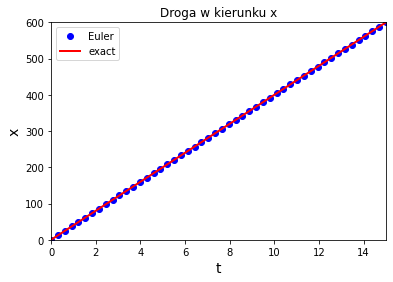

In [ ]:
plt.figure(1)
plt.title('Droga w kierunku x')

# uzupelnij
plt.plot(t, r[:, 0],'bo' , label = 'Euler')
plt.plot(t, v0[0] * t, 'r-', label = 'exact', lw = 2)

plt.axis([a,b,0,np.max(r[:,0])])
plt.legend()
plt.xlabel('t', fontsize =14)
plt.ylabel('x', fontsize =14)

Text(0, 0.5, 'y')

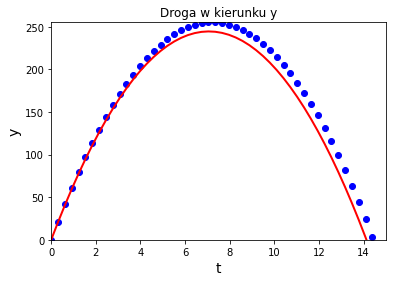

In [ ]:
plt.figure(2)
plt.title('Droga w kierunku y')

plt.plot(t, r[:, 1],'bo' , label = 'Euler')
plt.plot(t, (v0[1] * t) + ((g[1]* (t**2))/2), 'r-', label = 'exact', lw = 2)
plt.axis([a,b,0,np.max(r[:,1])])
plt.xlabel('t', fontsize =14)
plt.ylabel('y', fontsize =14)

Text(0, 0.5, 'v')

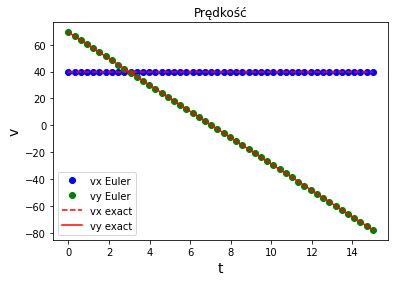

In [ ]:
plt.figure(3)
plt.title("Prędkość")

plt.plot(t, v[:, 0],'bo',label = 'vx Euler')
plt.plot(t, v[:, 1],'go',label = 'vy Euler')

plt.plot(t, v0[0] * np.ones(len(t)),'r--',label = 'vx exact')
plt.plot(t, v0[1] + g[1] * t,'r-',label = 'vy exact')

plt.legend()
plt.xlabel('t', fontsize =14)
plt.ylabel('v', fontsize =14)

Text(0, 0.5, 'Energia')

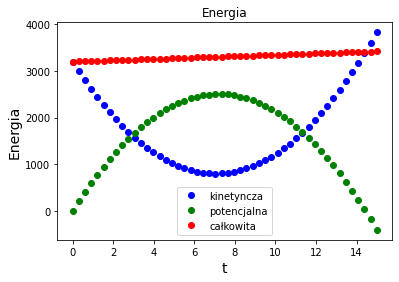

In [ ]:
plt.figure(4)
plt.title("Energia")

Ek = (m * (v[:, 0]**2 + v[:, 1]**2 + v[:, 2]**2))/2
Ep = m * (- g[1]) * r[:, 1] 

plt.plot(t,Ek,'bo',label = 'kinetyncza')
plt.plot(t,Ep,'go',label = 'potencjalna')
plt.plot(t,Ep+Ek,'ro',label = 'całkowita')
plt.legend()
plt.xlabel('t', fontsize =14)
plt.ylabel('Energia', fontsize =14)

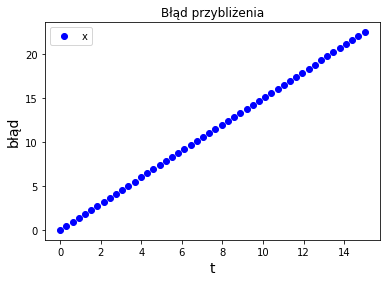

In [ ]:
plt.figure(5)
plt.title("Błąd przybliżenia")

plt.plot(t, r[:, 1] - ((v0[1] * t) + (g[1] * (t**2)/2)),'bo',label = 'x')

plt.legend()
plt.xlabel('t', fontsize =14)
plt.ylabel('błąd', fontsize =14)
plt.legend()
plt.show()

 # **Zadanie 2 (do domu)** 

### **Rzut ukośny w polu grawitacyjnym z uwzględnieniem oporu ośrodka**

**Zad. 1 a) i b)** rozwiąż w przypadku, gdy na punkt materialny poza siła grawitacyjną działa również siła oporu ośrodka postaci:

$F_t = - c {\bf v}$.

In [ ]:
a = 0
b = 15
n = 50
t = np.linspace(a,b,n)

m = 1
v0m = 80
alpha = np.pi/3

v0 = np.array([v0m * np.cos(alpha), v0m * np.sin(alpha), 0])
g  = np.array([0, -9.81, 0])
c  = 0.2
r0 = np.array([0, 0, 0])

def f1(r, v, t):
  return v

def f2(r, v, t):
  return g + ((-c)*v)


r, v  = odeEuler2(f1, f2, r0, v0, t)   

Text(0, 0.5, 'x')

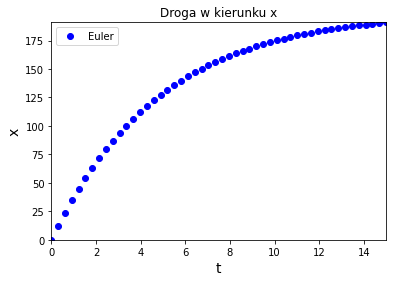

In [ ]:
plt.figure(1)
plt.title('Droga w kierunku x')

plt.plot(t, r[:, 0],'bo' , label = 'Euler')

plt.axis([a,b,0,np.max(r[:,0])])
plt.legend()
plt.xlabel('t', fontsize =14)
plt.ylabel('x', fontsize =14)

Text(0, 0.5, 'y')

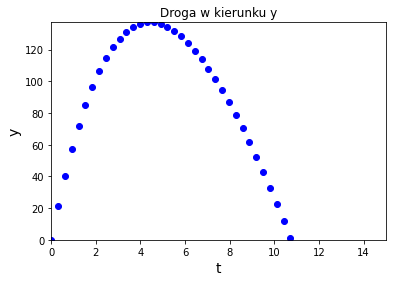

In [ ]:
plt.figure(2)
plt.title('Droga w kierunku y')

plt.plot(t, r[:, 1],'bo' , label = 'Euler')
plt.axis([a,b,0,np.max(r[:,1])])
plt.xlabel('t', fontsize =14)
plt.ylabel('y', fontsize =14)

Text(0, 0.5, 'v')

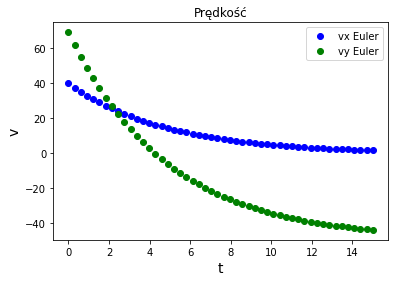

In [ ]:
plt.figure(3)
plt.title("Prędkość")

plt.plot(t, v[:, 0],'bo',label = 'vx Euler')
plt.plot(t, v[:, 1],'go',label = 'vy Euler')

plt.legend()
plt.xlabel('t', fontsize =14)
plt.ylabel('v', fontsize =14)

Text(0, 0.5, 'Energia')

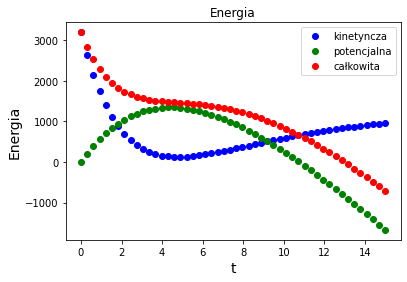

In [ ]:
plt.figure(4)
plt.title("Energia")

Ek = (m * (v[:, 0]**2 + v[:, 1]**2 + v[:, 2]**2))/2
Ep = m * (- g[1]) * r[:, 1] 

plt.plot(t,Ek,'bo',label = 'kinetyncza')
plt.plot(t,Ep,'go',label = 'potencjalna')
plt.plot(t,Ep+Ek,'ro',label = 'całkowita')
plt.legend()
plt.xlabel('t', fontsize =14)
plt.ylabel('Energia', fontsize =14)

 # **Zadanie 3 (do domu)** 

### **Rzut ukośny w polu grawitacyjnym z uwzględnieniem powierzchni**

**Zad. 1 a) i b)** rozwiąż w przypadku, gdy punkt materialny po opadnięciu odbija się od powierzchni w sposób elastyczny, tzn. bez utraty energii.

*Podpowiedź:* Po odbiciu zmień kierunek wektora $v_y$.

In [6]:
def odeEuler3(f1, f2, r0, v0, t):
    '''
    f1 : funkcja, prawa strona równania 1
    f2 : funkcja, prawa strona równania 2
    r0 : trójwymiarowy wektor położenia początkowego, tablica numpy
    v0 : trójwymiarowy wektor prędkości początkowych, tablica numpy
    t  : jednowymiarowy wektor puntków czasowych, tablica numpy
    '''
    r = np.zeros((len(t),3))
    v = np.zeros((len(t),3))
    r[0,:] = r0
    v[0,:] = v0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        if r[n, 1] < 0: #tu sobie patrzyłem czy coś się zmieni jak dam tak jak miał kolega na zajęciach, ale nie (stąd modyfikacja)
          v = v * [1, -1, 1]
        r[n+1,:] = r[n,:] + f1(r[n, :], v[n, :], t[n]) * h
        v[n+1,:] = v[n,:] + f2(r[n, :], v[n, :], t[n]) * h
    return r ,v

In [3]:
a = 0
b = 150
n = 500
t = np.linspace(a,b,n)

m = 1
v0m = 80
alpha = np.pi/3

v0 = np.array([v0m * np.cos(alpha), v0m * np.sin(alpha), 0])
g  = np.array([0, -9.81, 0])
r0 = np.array([0, 0, 0])

def f1(r, v, t):
  return v

def f2(r, v, t):
  return g


r, v  = odeEuler3(f1, f2, r0, v0, t)  

Text(0, 0.5, 'x')

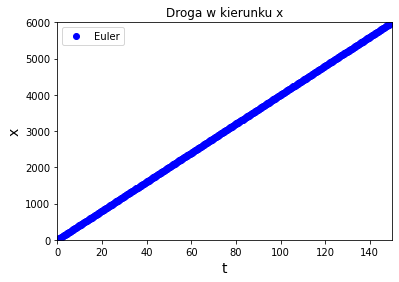

In [4]:
plt.figure(1)
plt.title('Droga w kierunku x')

plt.plot(t, r[:, 0],'bo' , label = 'Euler')

plt.axis([a,b,0,np.max(r[:,0])])
plt.legend()
plt.xlabel('t', fontsize =14)
plt.ylabel('x', fontsize =14)

Text(0, 0.5, 'y')

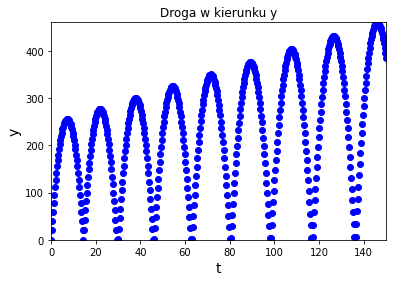

In [7]:
plt.figure(2)
plt.title('Droga w kierunku y')

plt.plot(t, r[:, 1],'bo' , label = 'Euler')
plt.axis([a,b,0,np.max(r[:,1])])
plt.xlabel('t', fontsize =14)
plt.ylabel('y', fontsize =14)

Text(0, 0.5, 'v')

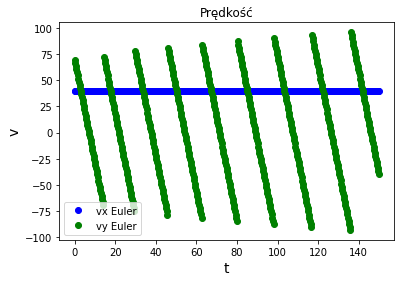

In [ ]:
plt.figure(3)
plt.title("Prędkość")

plt.plot(t, v[:, 0],'bo',label = 'vx Euler')
plt.plot(t, v[:, 1],'go',label = 'vy Euler')

plt.legend()
plt.xlabel('t', fontsize =14)
plt.ylabel('v', fontsize =14)

Text(0, 0.5, 'Energia')

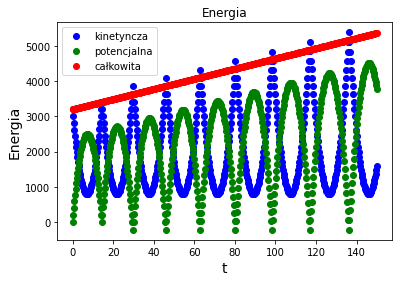

In [ ]:
plt.figure(4)
plt.title("Energia")

Ek = (m * (v[:, 0]**2 + v[:, 1]**2 + v[:, 2]**2))/2
Ep = m * (- g[1]) * r[:, 1] 

plt.plot(t,Ek,'bo',label = 'kinetyncza')
plt.plot(t,Ep,'go',label = 'potencjalna')
plt.plot(t,Ep+Ek,'ro',label = 'całkowita')
plt.legend()
plt.xlabel('t', fontsize =14)
plt.ylabel('Energia', fontsize =14)



---





---



## **Metoda Runge-Kutta rozwiązywania równań różniczkowych**

Metody Eulera i MidPoint można rozważać jako szczególne przypadki ogólniejszej metody rozwiązywania równań różniczkowych, w której kolejne punkty przybliżające $y$ wyznaczane są w sposób iteracyjny za pomocą niniejszej reguły:

> $y_{n+1} = y_{n} + h \sum_m {a_m k_m}$,

gdzie $a_m$ to wagi z jakimi uwzględnia się styczne $k_m$ w kolejnych krokach. Styczne te bierze się z przedziału $[t_n, t_{n+1}]$, a wagi muszą spełniać warunek $\sum_m a_m = 1$.

### Metoda Runge-Kutta 4 rzędu

W metodzie RK4 uwzględnia się wkład od 4 stycznych $k$ wyliczonych w następujący sposób:

> $k_1 = f(y_n, t_n)$ 
(styczna z początku przedziału, jak w metodzie **Eulera**)

> $k_2 = f(y_n + \frac{h}{2} k_1, t_n + \frac{h}{2} $)
(styczna ze środka przedziału, jak w metodzie **MidPoint**)

> $k_3 = f(y_n + \frac{h}{2} k_2, t_n + \frac{h}{2} $)
(styczna ze środka przedziału, ale korzystająca z lepszego oszacowania wartości y w punkcie środkowym)

> $k_4 = f(y_n + h k_3, t_n +h)$ 
(styczna z końca przedziału)

Powyższe styczne uwzględnia się z następującymi wagami:

> $y_{n+1} = y_n + \frac{h}{6}(k_1+ 2k_2 + 2k_3 + k_4)$

Rysunek poniżej ilustruje metode RK4 ([źródło](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods)).



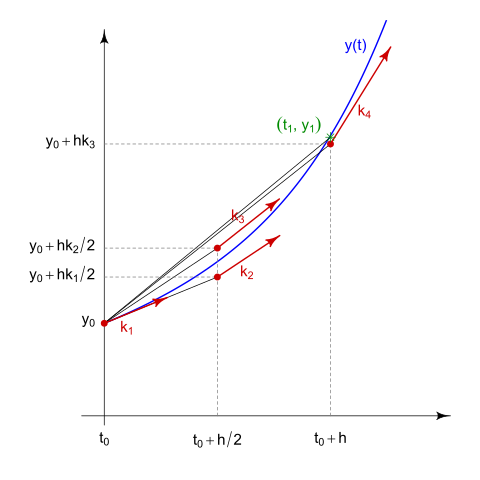

# **Zadanie 4** 

 Uzupełnij poniższą implementację metody RK4 rozwiązującą układ równań postaci:

> ### $ \frac{d{y}(t)}{dt} = {f}(y,t) $

z warunkiem początkowymi:

> $y_(0) = y_{0}$,


In [ ]:
def odeRK4(f, y0, t):
    '''
    f :  prawa strona równania, funkcja
    y0 : warunek początkowy, liczba
    t  : jednowymiarowy wektor puntków czasowych, tablica numpy
    '''
    x = np.zeros((len(t)))
    y = np.zeros((len(t)))
    z = np.zeros((len(t)))
    y[0] = y0

    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(y[n], t[n])
        k2 = f(y[n] + h*k1/2, t[n] + h/2)
        k3 = f(y[n] + h*k2/2, t[n] + h/2)
        k4 = f(y[n] + h*k3, t[n] + h)

        y[n+1] = y[n] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

    return y

# **Zadanie 5**

Sprawdź poprawność implementacji wykorzystująć równienie

> y'(t) = y

> y(0) = 1.

Text(0, 0.5, 'odeRK4')

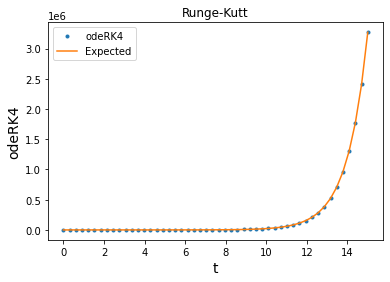

In [ ]:
a = 0
b = 15
n = 50
t = np.linspace(a,b,n)

y0 = 1

def f(y, t):
  return y

plt.figure(1)
plt.title('Runge-Kutt')

plt.plot(t, odeRK4(f, y0, t),'.' , label = 'odeRK4')
plt.plot(t, np.exp(t), '-', label = 'Expected')

plt.legend()
plt.xlabel('t', fontsize =14)
plt.ylabel('odeRK4', fontsize =14)

# **Zadanie domowe** 

### **Chaos deterministyczny**

Uzupełnij funkcję OdeEuler3, która będzie rozwiązywała trójwymiarowy układ równań różniczkowych zwyczajnych i użyj jej, do rozwiązania [układu Lorentza](https://en.wikipedia.org/wiki/Lorenz_system):
<math> \begin{align}
\frac{\mathrm{d}x}{\mathrm{d}t} &= \sigma (y - x), \\[6pt]
\frac{\mathrm{d}y}{\mathrm{d}t} &= x (\rho - z) - y, \\[6pt]
\frac{\mathrm{d}z}{\mathrm{d}t} &= x y - \beta z.
\end{align} </math>

Przyjmij $\rho = 28$, $\sigma = 10$ oraz $\beta = 8/3$.


In [11]:
def odeEuler3(f1, f2 ,f3, x0, y0, z0, t):
    '''
    f1 : funkcja, prawa strona równania 1
    f2 : funkcja, prawa strona równania 2
    f3 : funkcja, prawa strona równania 3
    x0 : zmienna początka x
    y0 : zmienna początka y
    z0 : zmienna początka z
    t  : jednowymiarowy wektor punktów czasowych, tablica numpy
    '''
    x = np.zeros(len(t))
    y = np.zeros(len(t))
    z = np.zeros(len(t))
    x[0] = x0
    y[0] = y0
    z[0] = z0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        x[n+1] = x[n] + f1(x[n], y[n], t[n], 10.0) * h
        y[n+1] = y[n] + f2(x[n], y[n], z[n], t[n], 28.0) * h
        z[n+1] = z[n] + f3(x[n], y[n], z[n], t[n], 8.0 / 3.0) * h
    return x, y, z

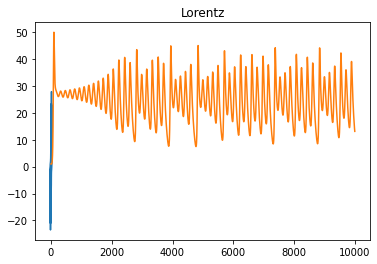

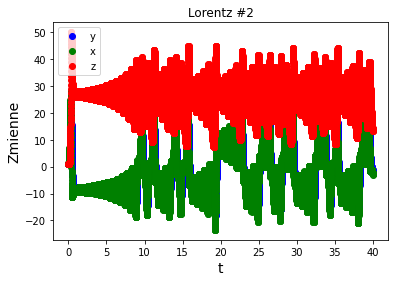

In [12]:
# Tu rozwiąż układ Lorentza
a = 0
b = 40
n = 10000
t = np.linspace(a, b, n)

x0 = 1.0
y0 = 1.0
z0 = 1.0

def f1(x, y, t, sigma):
  return sigma * (y - x)

def f2(x, y, z, t, rho):
  return (x * (rho - z)) - y

def f3(x, y, z, t, beta):
  return (x * y) - (beta * z)

x, y, z = odeEuler3(f1, f2, f3, x0, y0, z0, t)

plt.figure(1)
plt.title("Lorentz")
plt.plot(x, y, z)
plt.show()

#Nie jestem pewien jak ten wykres powinen wyglądać, więc mam dwa

plt.figure(2)
plt.title("Lorentz #2")
plt.plot(t, x,'bo',label = 'y')
plt.plot(t, y,'go',label = 'x')
plt.plot(t, z,'ro',label = 'z')

plt.xlabel('t', fontsize =14)
plt.ylabel('Zmienne', fontsize =14)

plt.legend()
plt.show()